### Paper 4 Machine Learning (Hierarchial Clustering)

Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error

Load the Data and select only the relevent features from the data

In [2]:

data = pd.read_csv("data/2015.csv")
features = data.drop(["Country", "Region", "Happiness Rank", "Happiness Score", "Standard Error"], axis=1)
labels = data["Happiness Score"]
print(features)

     Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
0                     1.39651  1.34951                   0.94143  0.66557   
1                     1.30232  1.40223                   0.94784  0.62877   
2                     1.32548  1.36058                   0.87464  0.64938   
3                     1.45900  1.33095                   0.88521  0.66973   
4                     1.32629  1.32261                   0.90563  0.63297   
..                        ...      ...                       ...      ...   
153                   0.22208  0.77370                   0.42864  0.59201   
154                   0.28665  0.35386                   0.31910  0.48450   
155                   0.66320  0.47489                   0.72193  0.15684   
156                   0.01530  0.41587                   0.22396  0.11850   
157                   0.20868  0.13995                   0.28443  0.36453   

     Trust (Government Corruption)  Generosity  Dystopia Residual  
0      

Determine the best number of estimators and criterion type for the default Random Forest Regressor

In [14]:

X_train, X_test, y_train, y_test = train_test_split(features, labels, random_state=0)
highest_score = 0
highest_criterion = ""
highest_estimators = 0
lowest_rmse = 1
rmse_criterion = ""
rmse_estimators = 0
estimators = [100, 200, 300, 400, 500, 600, 700, 800, 900]
crits = ["squared_error" , "absolute_error", "poisson"]
scoreRes = {"squared_error": [], "absolute_error": [], "poisson": []}
rmseRes = {"squared_error": [], "absolute_error": [], "poisson": []}
for estimator in estimators:
    for crit in crits:
        model = RandomForestRegressor(n_estimators=estimator, criterion=crit, random_state=0)
        model.fit(X_train, y_train)
        pred = model.predict(X_test)
        score = r2_score(y_test, pred)
        rmse = mean_squared_error(y_test, pred, squared=False)
        if score > highest_score:
            highest_score = score
            highest_criterion = crit
            highest_estimators = estimator
        if rmse < lowest_rmse:
            lowest_rmse = rmse
            rmse_criterion = crit
            rmse_estimators = estimator
        print("For estimators=%d, criterion=%s, Score=%f, RMSE=%f" % (estimator, crit, score, rmse))
        scoreRes[crit].append(score)
        rmseRes[crit].append(rmse)

print("The number of estimators and best criterion for the highest score of %f is : %d, %s" % (highest_score, highest_estimators, highest_criterion))
print("For RMSE (%f) optimal estimators is %d, criterion is %s" % (lowest_rmse, rmse_estimators, rmse_criterion))

For estimators=100, criterion=squared_error, Score=0.937350, RMSE=0.252830
For estimators=100, criterion=absolute_error, Score=0.939096, RMSE=0.249281
For estimators=100, criterion=poisson, Score=0.351572, RMSE=0.813388
For estimators=200, criterion=squared_error, Score=0.939333, RMSE=0.248795
For estimators=200, criterion=absolute_error, Score=0.939003, RMSE=0.249471
For estimators=200, criterion=poisson, Score=0.362396, RMSE=0.806570
For estimators=300, criterion=squared_error, Score=0.940608, RMSE=0.246167
For estimators=300, criterion=absolute_error, Score=0.942210, RMSE=0.242825
For estimators=300, criterion=poisson, Score=0.355989, RMSE=0.810613
For estimators=400, criterion=squared_error, Score=0.942577, RMSE=0.242053
For estimators=400, criterion=absolute_error, Score=0.944420, RMSE=0.238136
For estimators=400, criterion=poisson, Score=0.348184, RMSE=0.815510
For estimators=500, criterion=squared_error, Score=0.942171, RMSE=0.242907
For estimators=500, criterion=absolute_error,

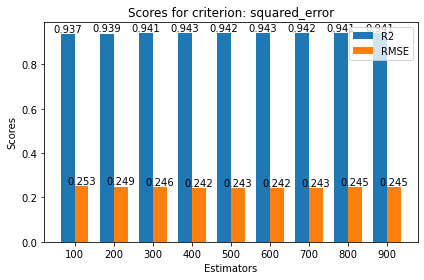

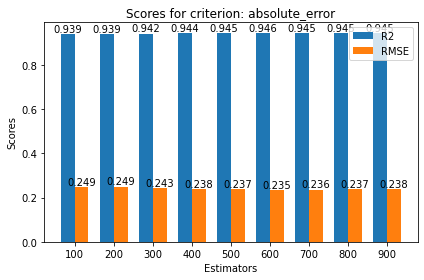

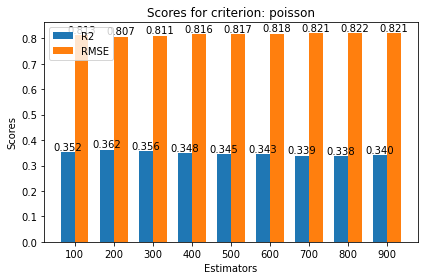

In [29]:
for crit in crits:
    width = 0.35
    x = np.arange(len(estimators)) 
    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, scoreRes[crit], width, label='R2')
    rects2 = ax.bar(x + width/2, rmseRes[crit], width, label='RMSE')
    ax.set_xlabel('Estimators')
    ax.set_ylabel('Scores')
    ax.set_title("Scores for criterion: " + crit)
    ax.set_xticks(x, estimators)
    ax.legend()
    
    ax.bar_label(rects1, fmt = '%.3f')
    ax.bar_label(rects2, fmt = '%.3f')

    fig.tight_layout()

    plt.show()

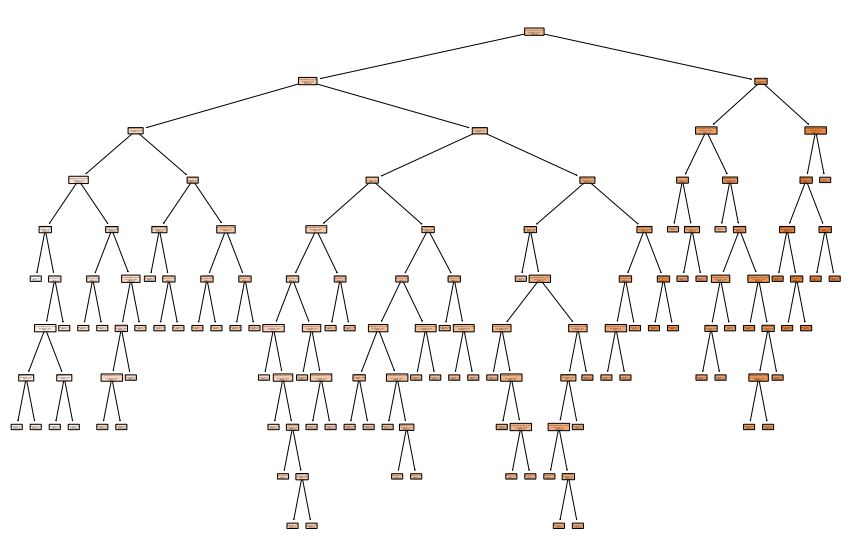

In [63]:
from sklearn.tree import plot_tree

# Draw decision tree for default Random Forest Classifier
model = RandomForestRegressor(n_estimators=600, criterion="absolute_error", random_state=0)
model.fit(X_train, y_train)

fig = plt.figure(figsize=(15, 10))
plot_tree(model.estimators_[0], 
          feature_names=features.columns,
          filled=True, impurity=True, 
          rounded=True, max_depth=1)

fig.savefig("RandomForestRegressorOutputDepth1")

plot_tree(model.estimators_[0], 
          feature_names=features.columns,
          filled=True, impurity=True, 
          rounded=True)

fig.savefig("RandomForestRegressorOutput")
